## Trade&Ahead: Problem Statement

###Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

### Objective

Trade&Ahead is a financial consultancy firm that provides its customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Description
The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock is currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)


## Importing necessary libraries

In [ ]:
# Reading and manipulating data
import pandas as pd
import numpy as np

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Missing value imputation
from sklearn.impute import SimpleImputer

# K-means clustering and silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Scale data using z-score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Visualization of elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Compute distances
from scipy.spatial.distance import pdist, cdist

# Hierarchical clustering, Cophenetic correlation, and Dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# PCA
from sklearn.decomposition import PCA

# Supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DS&BA @ UTA/Module 7/DataSets/stock_data.csv")

In [ ]:
df = data.copy()

## Data Overview

### Random rows of the dataset



In [ ]:
df.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000,-15.478,2.924,205,70,830000000,-14454000000,-35.550,406582278.500,93.089,1.786
125,FB,Facebook,Information Technology,Internet Software & Services,104.660,16.224,1.321,8,958,592000000,3669000000,1.310,2800763359.000,79.893,5.884
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.030,7.579,1.163,15,47,21818000,248710000,1.520,163625000.000,26.336,-1.269
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410,10.661,0.806,17,129,160383000,636056000,3.280,491391569.000,24.070,-2.257
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610,0.865,1.590,32,64,-588000000,-7829000000,-10.230,765298142.700,93.089,3.345
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516,-8.699,1.479,142,27,159000000,1293000000,2.970,435353535.400,17.682,-3.838
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130,-21.254,2.365,2,201,523803000,85171000,0.560,152091071.400,93.089,9.568
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040,-5.102,1.966,4,189,7786000000,-671000000,-0.790,849367088.600,93.089,17.346
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.620,3.654,1.160,20,99,2288000000,2297000000,5.140,446887159.500,10.432,-0.376
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480,7.067,1.581,12,67,412000000,968100000,2.260,428362831.900,14.814,4.219


- Data was loaded properly

### Shape of the dataset


In [ ]:
df.shape

(340, 15)

- Data set consists of 340 rows and 15 columns.
- 'Security' column lists all company names.


### Data types of the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- There are 11 numerical columns and 4 categorical that correspond to company names, industry catgories, and stock names.
- There's no missing values.

### Statistical summary

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.000,NaN,NaN,NaN,80.862,98.055,4.500,38.555,59.705,92.880,1274.950
Price Change,340.000,NaN,NaN,NaN,4.078,12.006,-47.130,-0.939,4.820,10.695,55.052
Volatility,340.000,NaN,NaN,NaN,1.526,0.592,0.733,1.135,1.386,1.696,4.580
ROE,340.000,NaN,NaN,NaN,39.597,96.548,1.000,9.750,15.000,27.000,917.000
Cash Ratio,340.000,NaN,NaN,NaN,70.024,90.421,0.000,18.000,47.000,99.000,958.000
Net Cash Flow,340.000,NaN,NaN,NaN,55537620.588,1946365312.176,-11208000000.000,-193906500.000,2098000.000,169810750.000,20764000000.000


- There's 11 GICS sectors, with Industrials being the most recurring.
- There's 104 GICS sub industries, with oil and gas exploration and production being the most recurring.
- Current price ranges from  4.5 to 1274.95, meaning there's a lot of outlires.
- Price Change ranges from  -47.13 to 55.05, and average falls on 4.07, so there must be outliers too.
- Average volatility is 1.526.
- There's a big gap between the lowest and highest ROE; we'll see outliers here too.
- Some companies seem to have 0 cash ratio, meaning they're facing problems with covering company's current liabilities immediately.
- Net cash flow gets as low as -11 Billions and as high as 20 Billions.
- Net income shows big negative values, so there must be companies with high debts. Companies with negative income are probably the same as those with negative cash flow.
- There's also companies with negative earnings per share, meaning they must be the ones who are facing financial crisis.
- Outstanding shares range from 27 millions, to 6 billions.
- P/E Ratio shows the value of each stock by telling how much is being paid per dollar of earning. There's companies who's P/E ratio is as low as 2.9 and others that go as high as 528.
- Negative P/B ratio could indicate either undervalued stocks or fundamental problems with the specific company. It's a great indicator for potential investment if correctly diagnosed.

### Checking for duplicate values



In [ ]:
df.duplicated().sum()

0

- No duplicated values.

## EDA Summary


### Univariate analysis

In [ ]:
# Function to plot distirbution of numerical variables
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

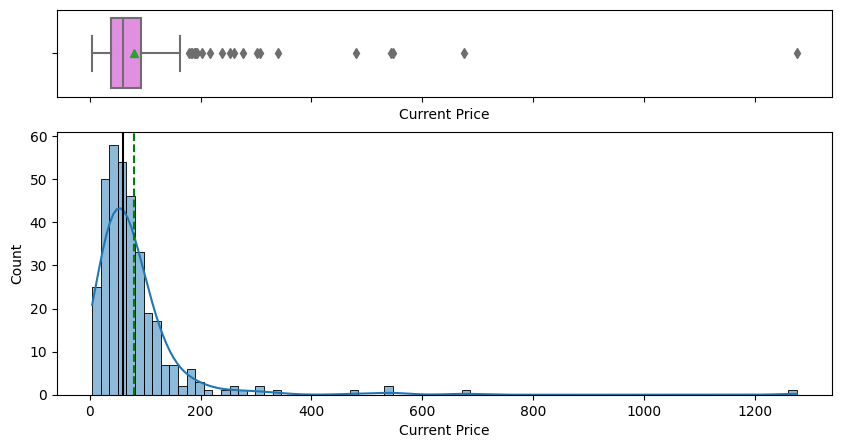

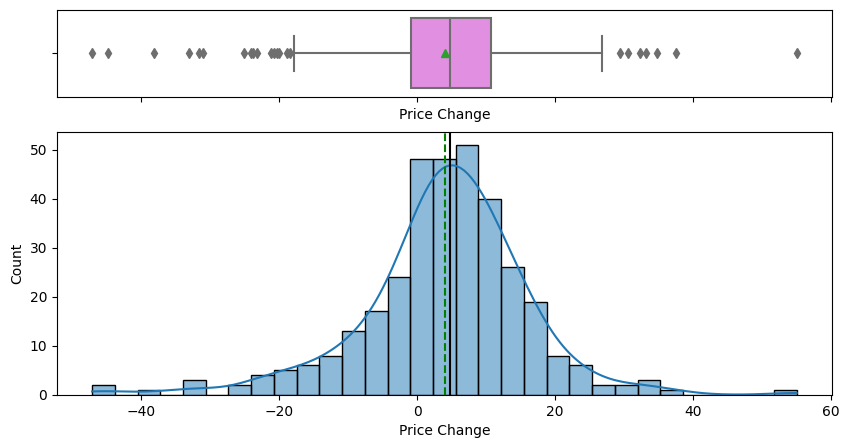

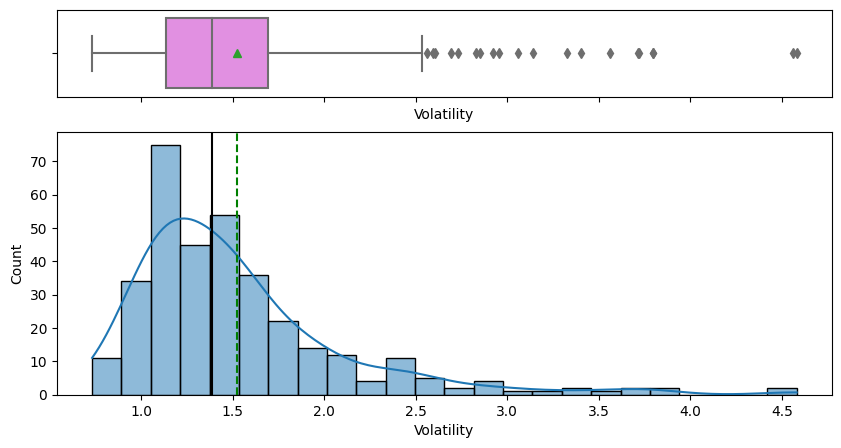

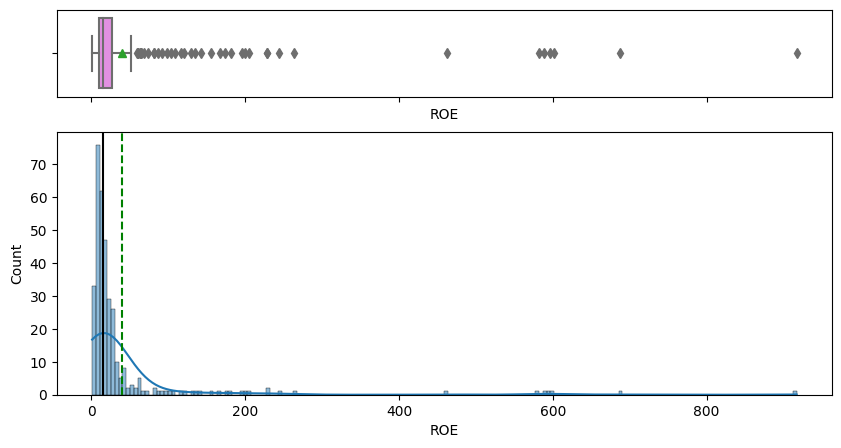

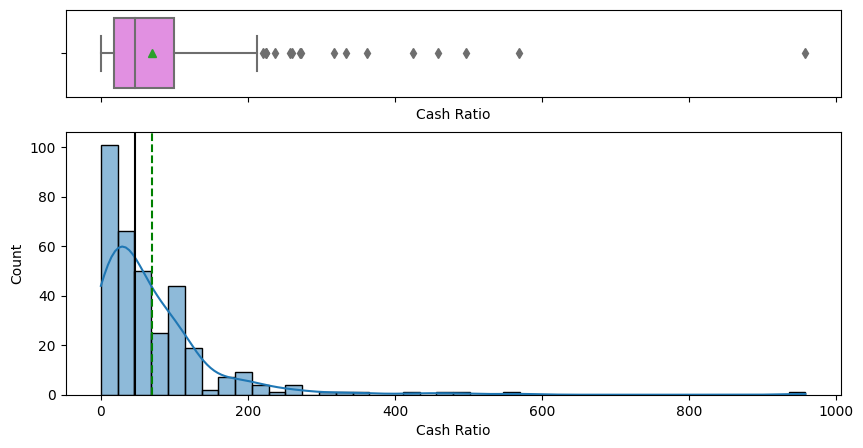

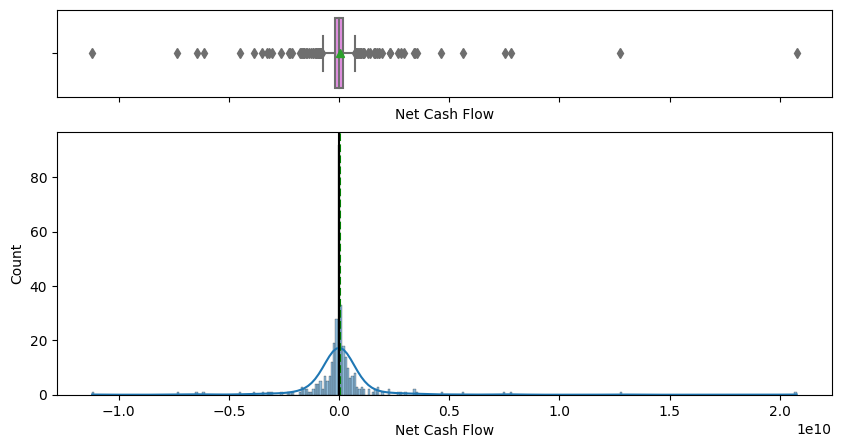

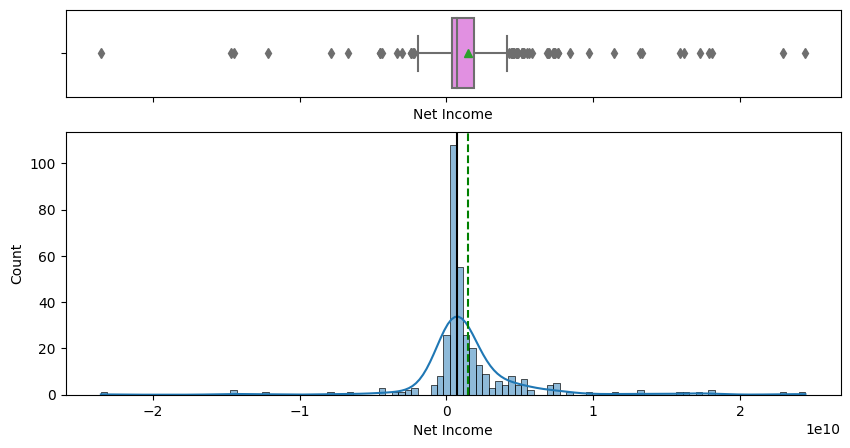

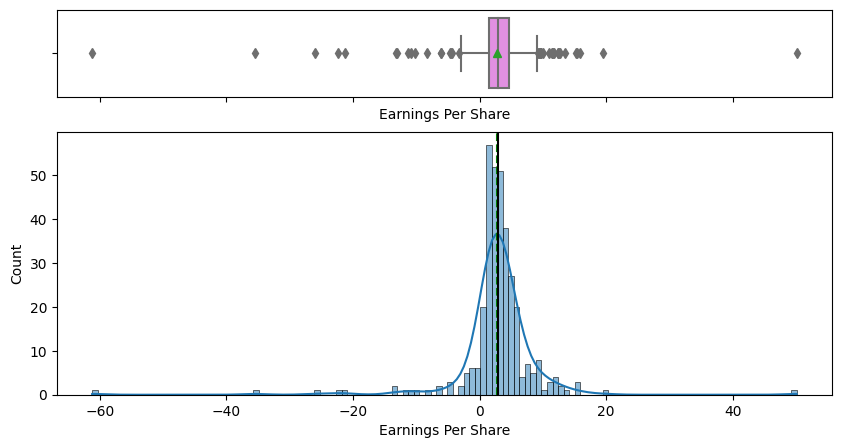

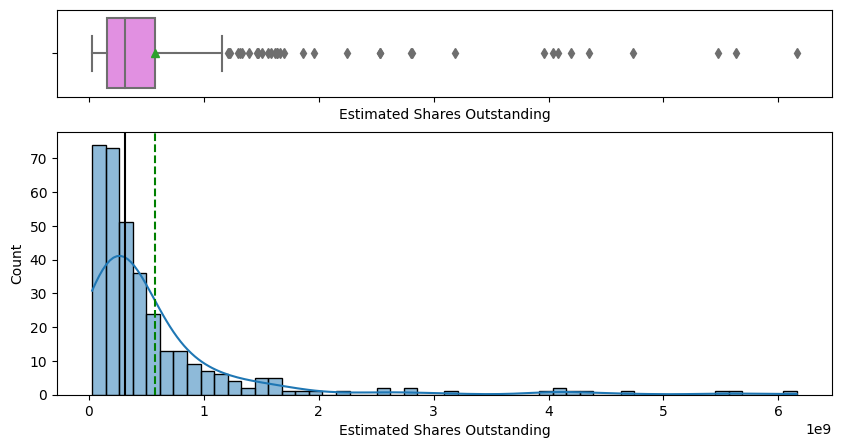

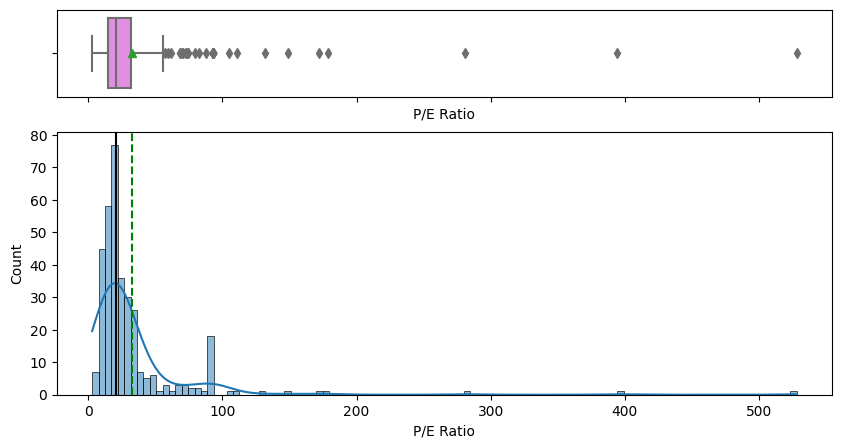

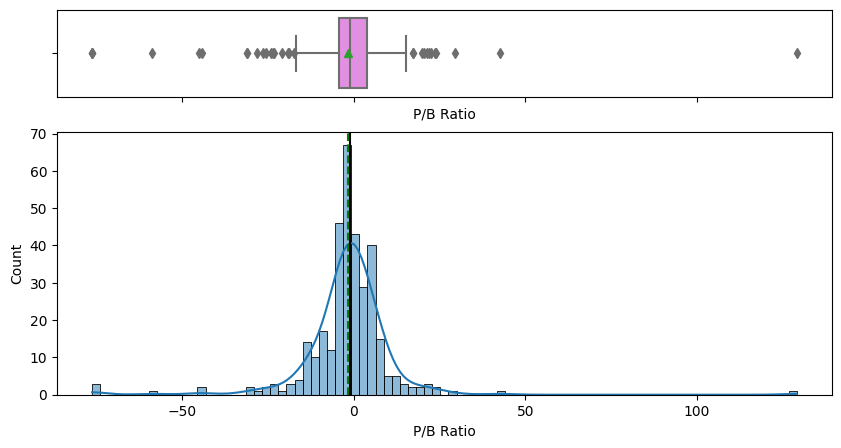

In [ ]:
# Creating conditional statement to graph all numerical variables at once
for i in num_cols:
    histogram_boxplot(df[num_cols], i, figsize=(10, 5), kde=True, bins=None)

- Average current price is ~$90 (right-skewed), with an average price change of around 5% (normally distributed).
- 75% of stocks have a standard deviation of less than 1.7 (right-skewed).
- All variables have outliers but we won't treat them as they stand for real values.

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

plt.show()  # show the plot

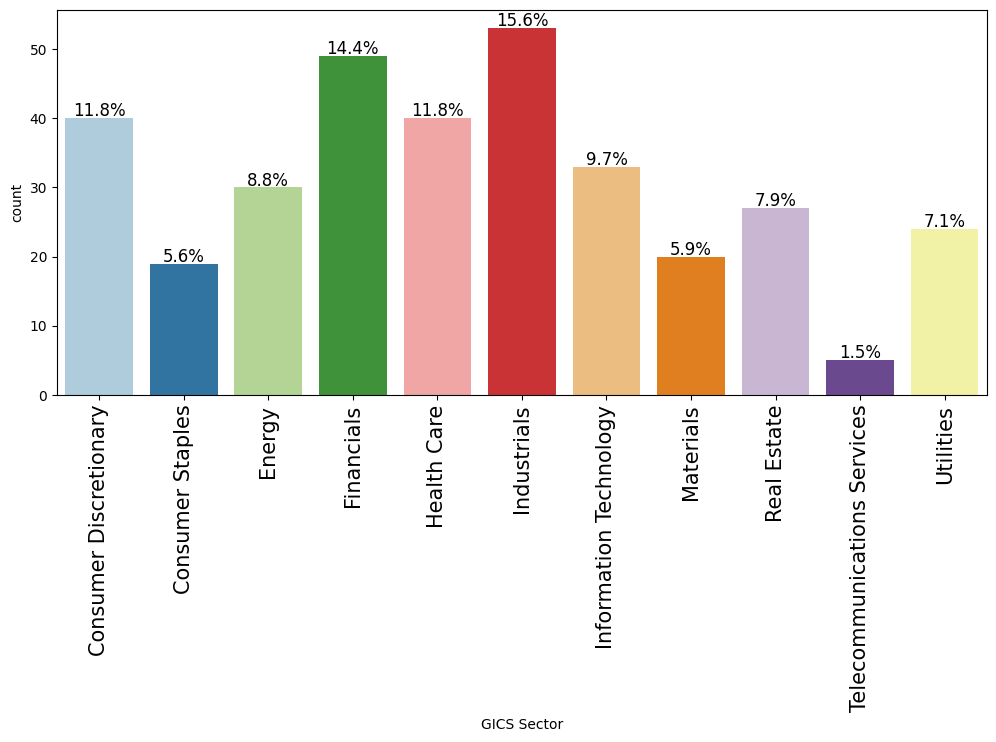

In [ ]:
labeled_barplot(df, "GICS Sector", perc=True)

- Number one GICS sector with the most companies in it is Industrials(15.6%), followed by Financials(14.4%) and then Consumer Discretionary(11.8%).
- Telecommunications Services sector has the least amount of companies(1.5%).

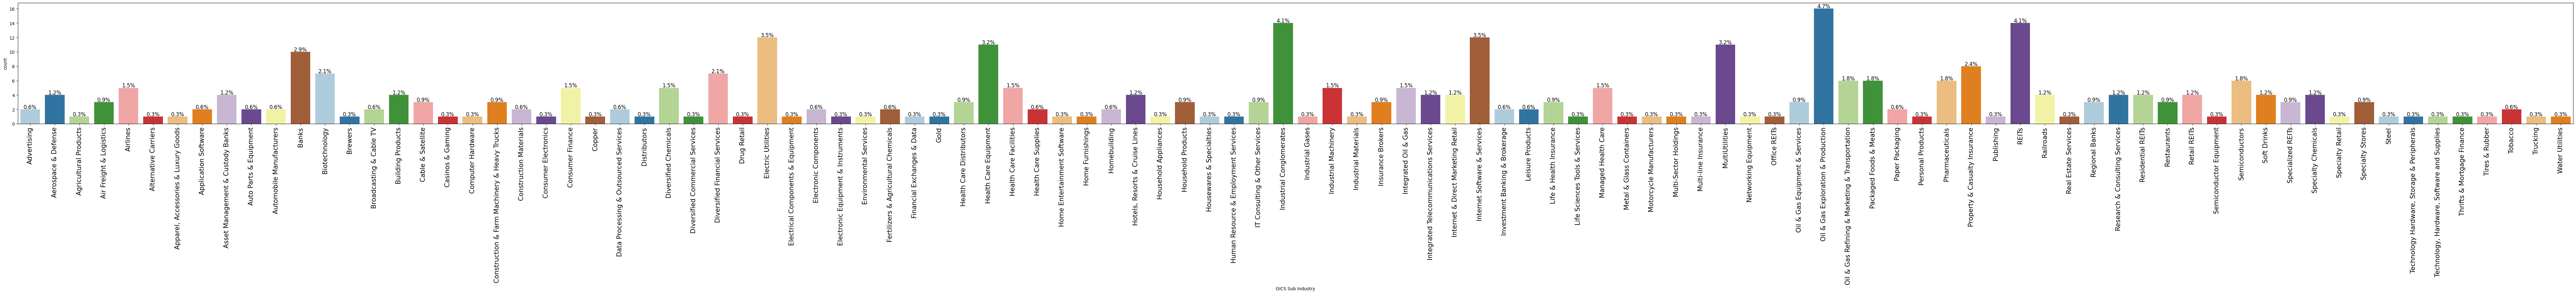

In [ ]:
labeled_barplot(df, "GICS Sub Industry", perc=True)

- Number one GICS sub industry with the most companies in it is Oil and Gas Exploration and Production(4.7%), followed by Industrial Conglomerates(4.1%) and REITs(4.1%).

### Bivariate analysis

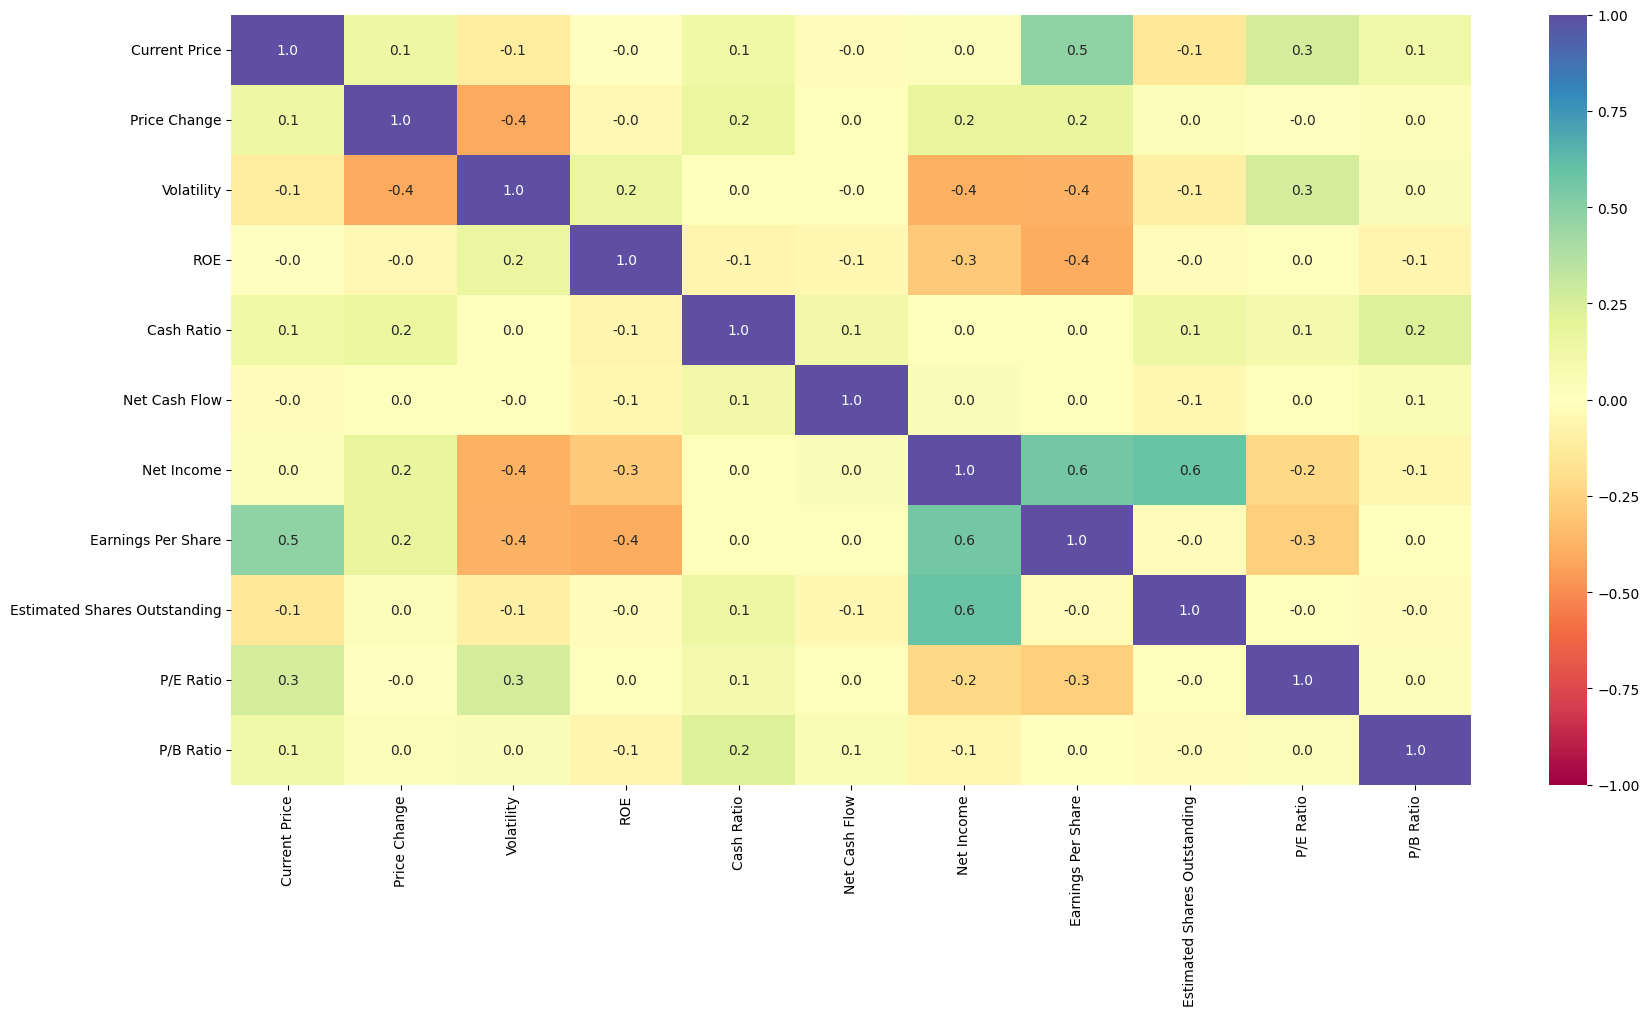

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, fmt=".1f", vmax=1, cmap="Spectral")
plt.show()

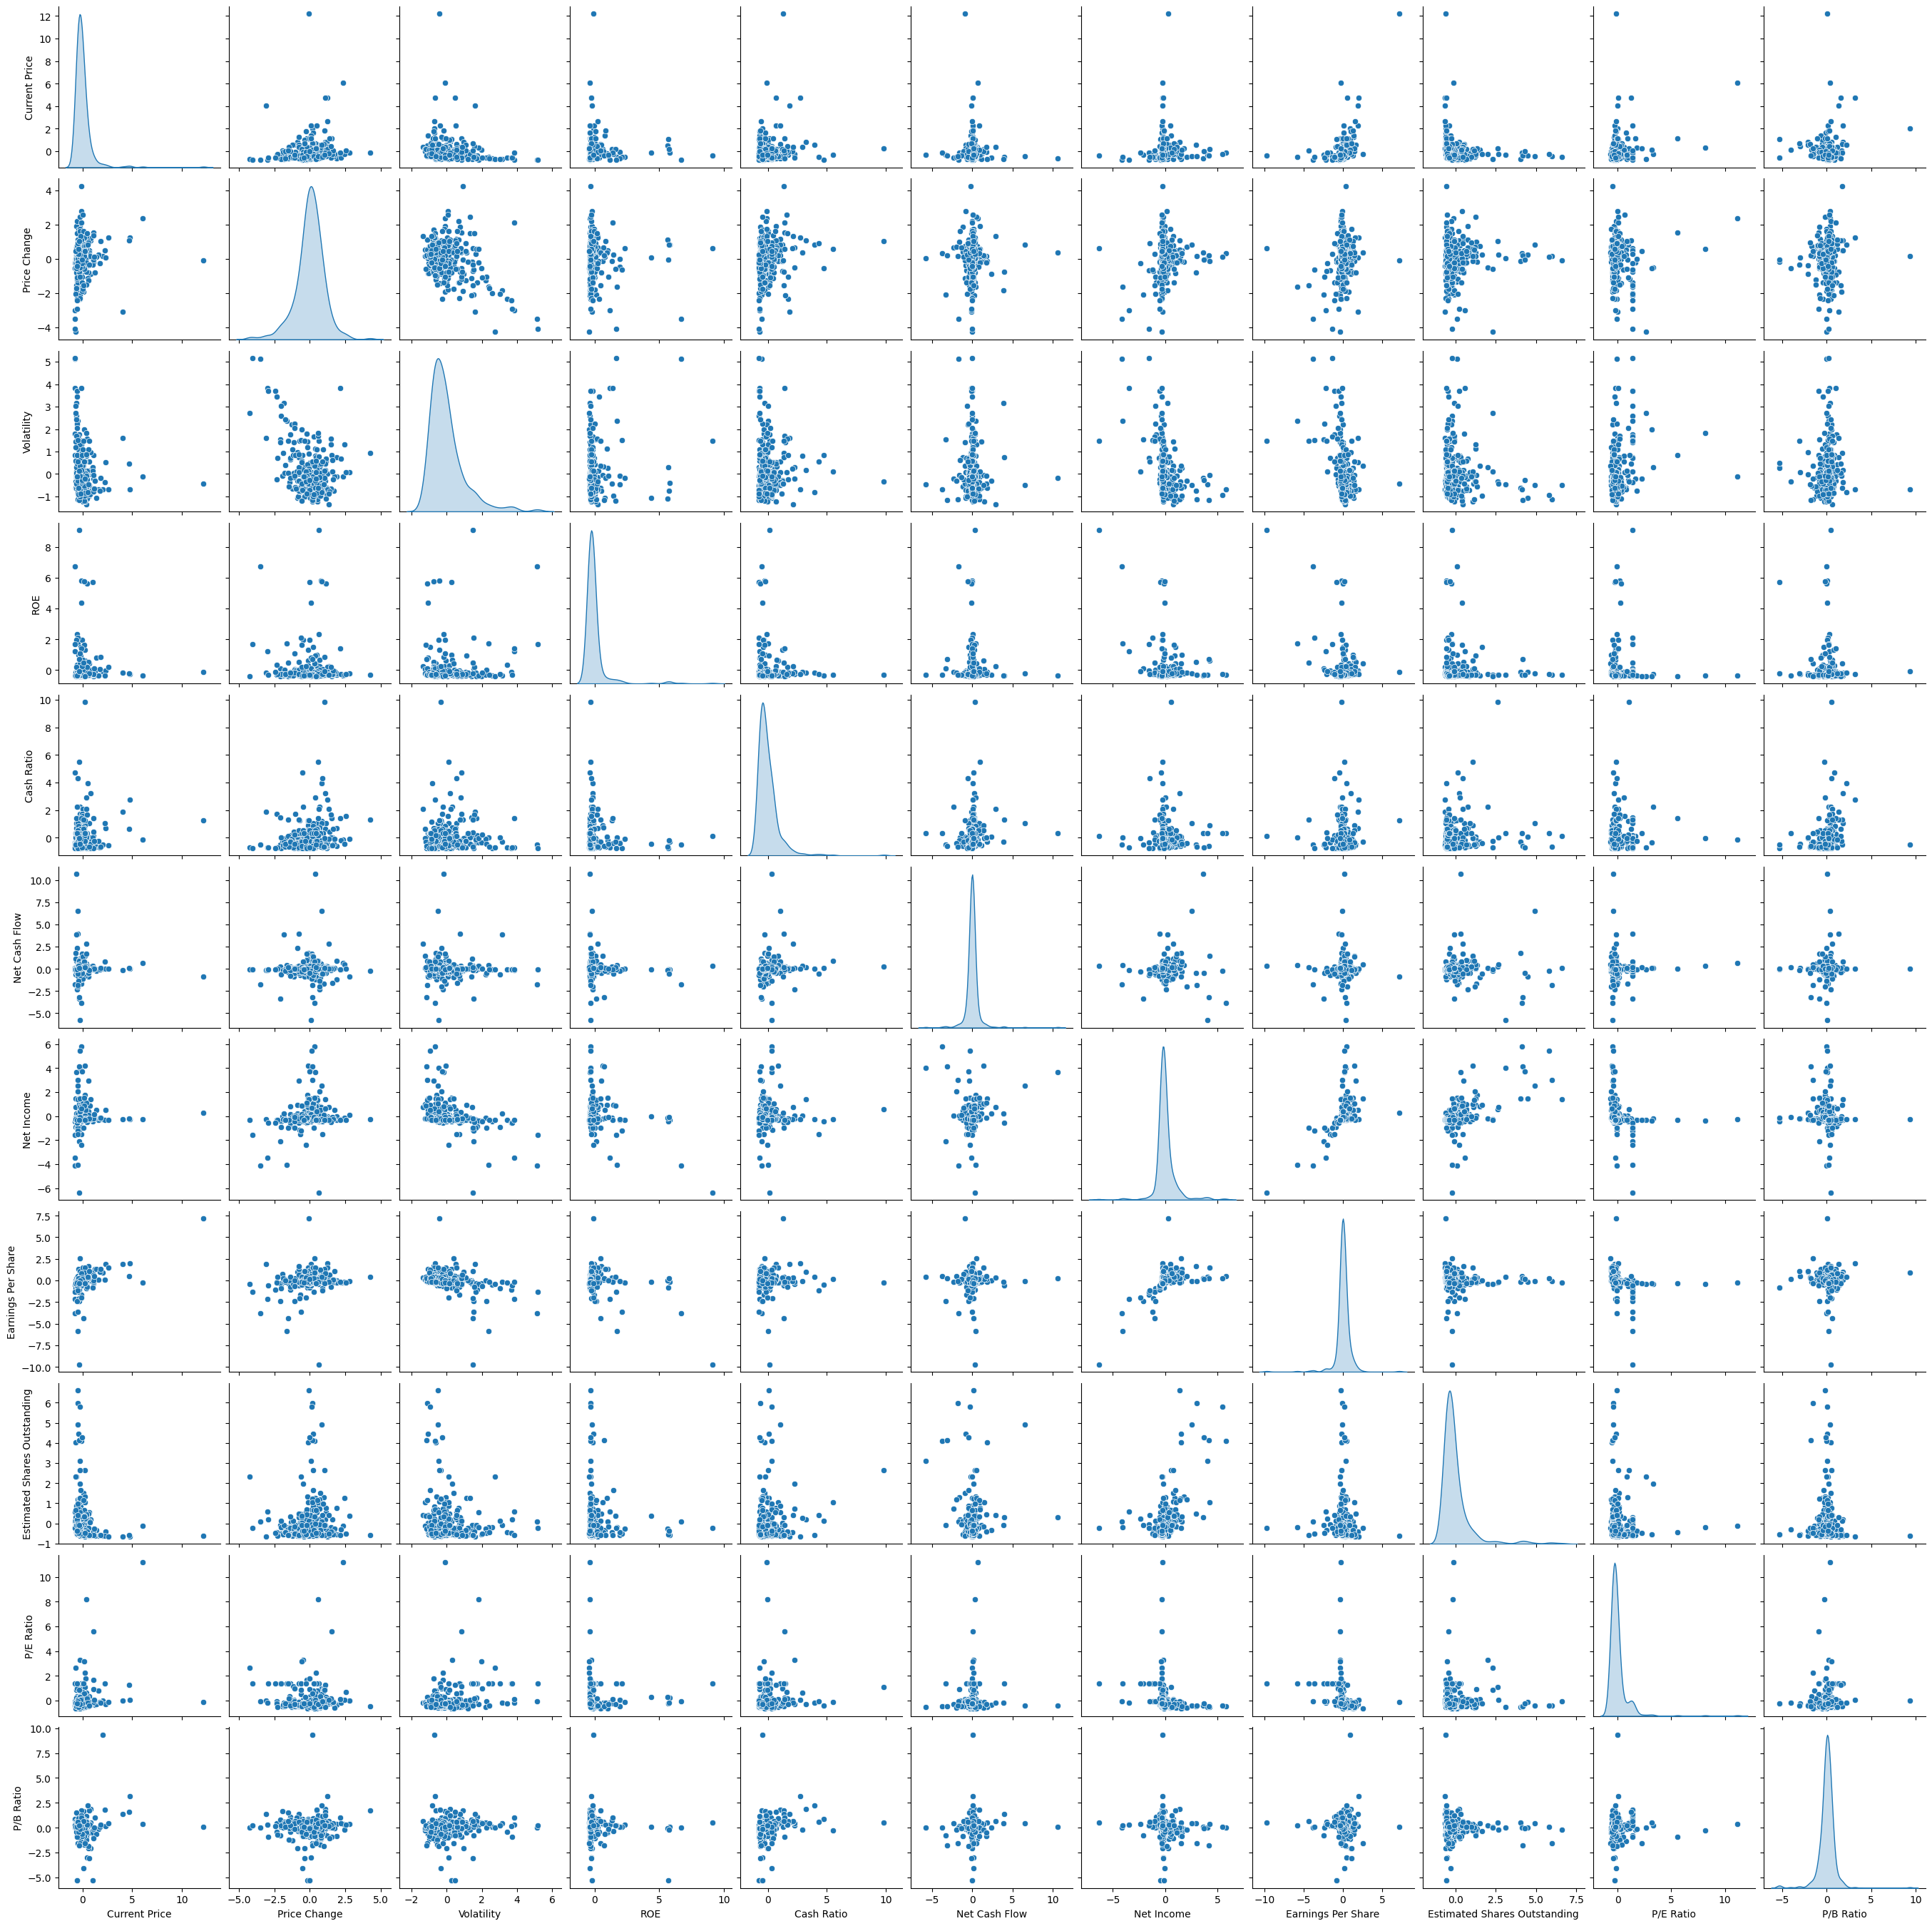

In [ ]:
#only occupying columns from 4 to n
dfAttr=df.iloc[:,4:]
#representing column values with their standard variations for easier clustering and reading
dfAttrScaled=dfAttr.apply(zscore)
sns.pairplot(dfAttrScaled,diag_kind='kde')

- Earnings per share and current stock price have a moderate positive correlation of 50%, meaning that higher priced stocks might give higher earnings.
- Net income is moderately positively correlated to estimated shares outstanding and earnings per share, meaning that companies with higher incomes tend to have more shares as well as higher earnings per share.











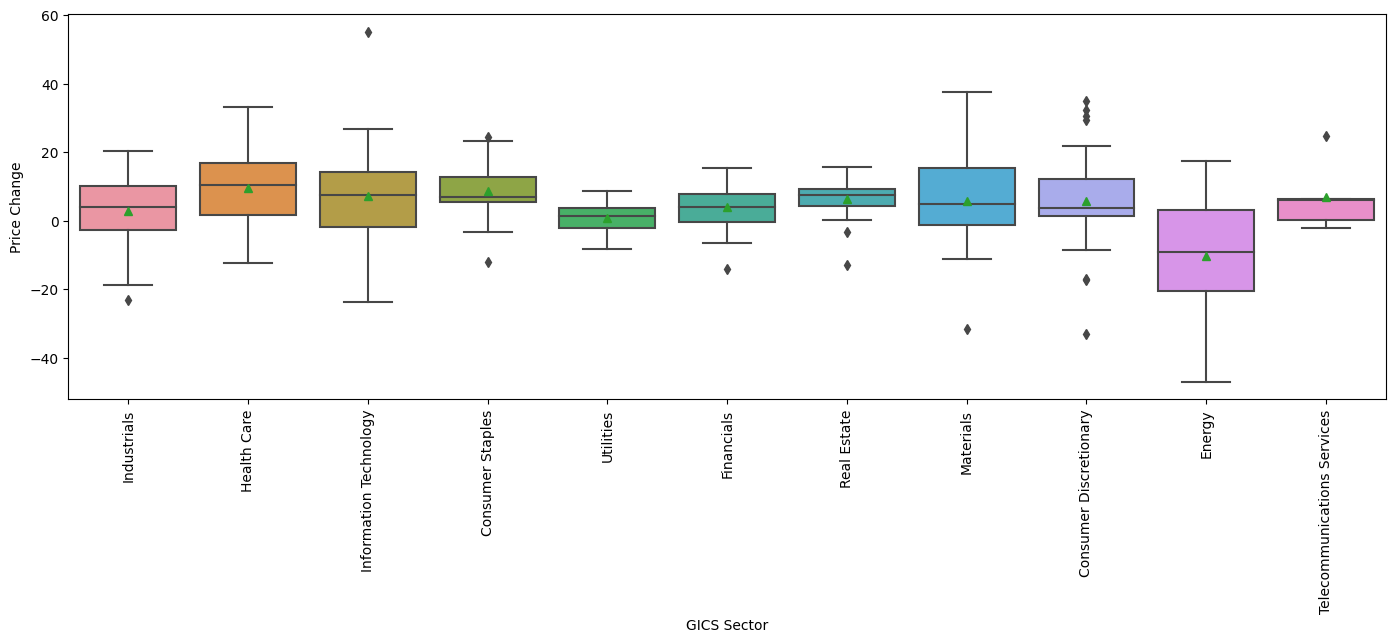

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="GICS Sector", y="Price Change", showmeans=True)
plt.xticks(rotation=90)
plt.show()

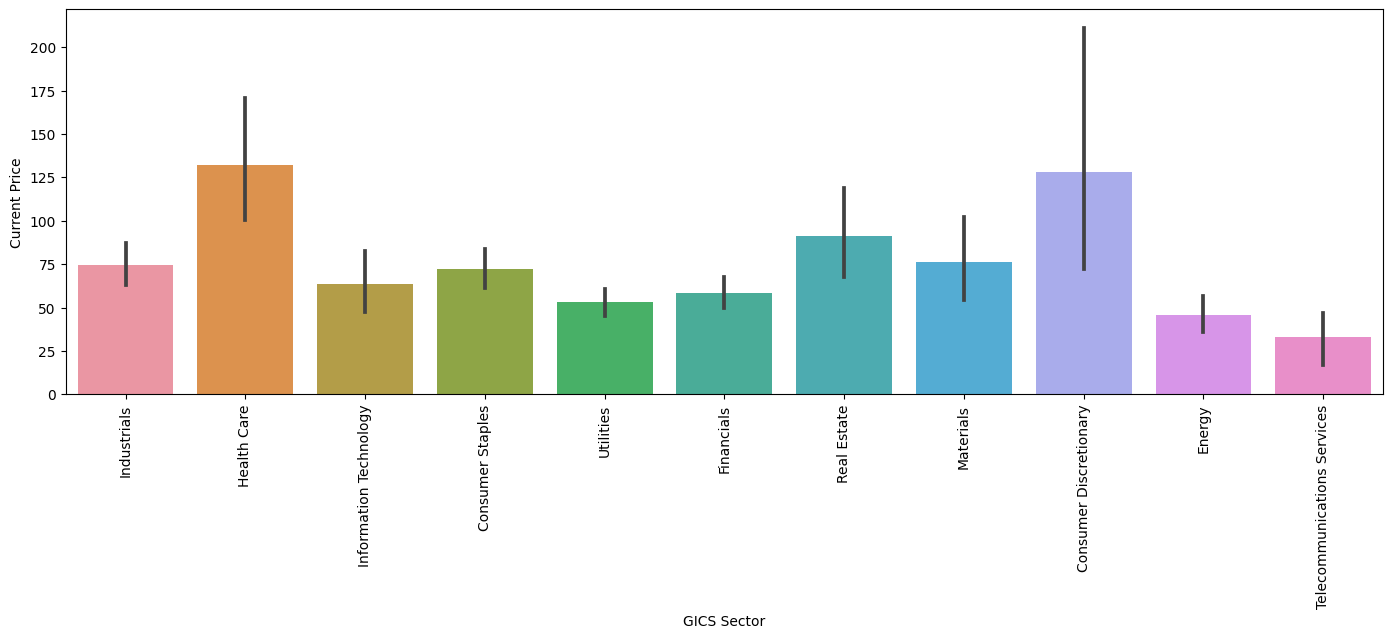

In [ ]:
plt.figure(figsize=(17, 5))
sns.barplot(data=df, x="GICS Sector", y="Current Price")
plt.xticks(rotation=90)
plt.show()

- The highest priced sector is Health Care, with an average cost per stock of ~126. Followed by Consumer Discretionary, with an average cost per stock of ~124. Consumer Discretionary has some outliers that overpass the most expensive Health Care stocks by around 50.
- By average, Health Care seems to have had the highest price increase in the last 13 weeks, going up by around 10%.

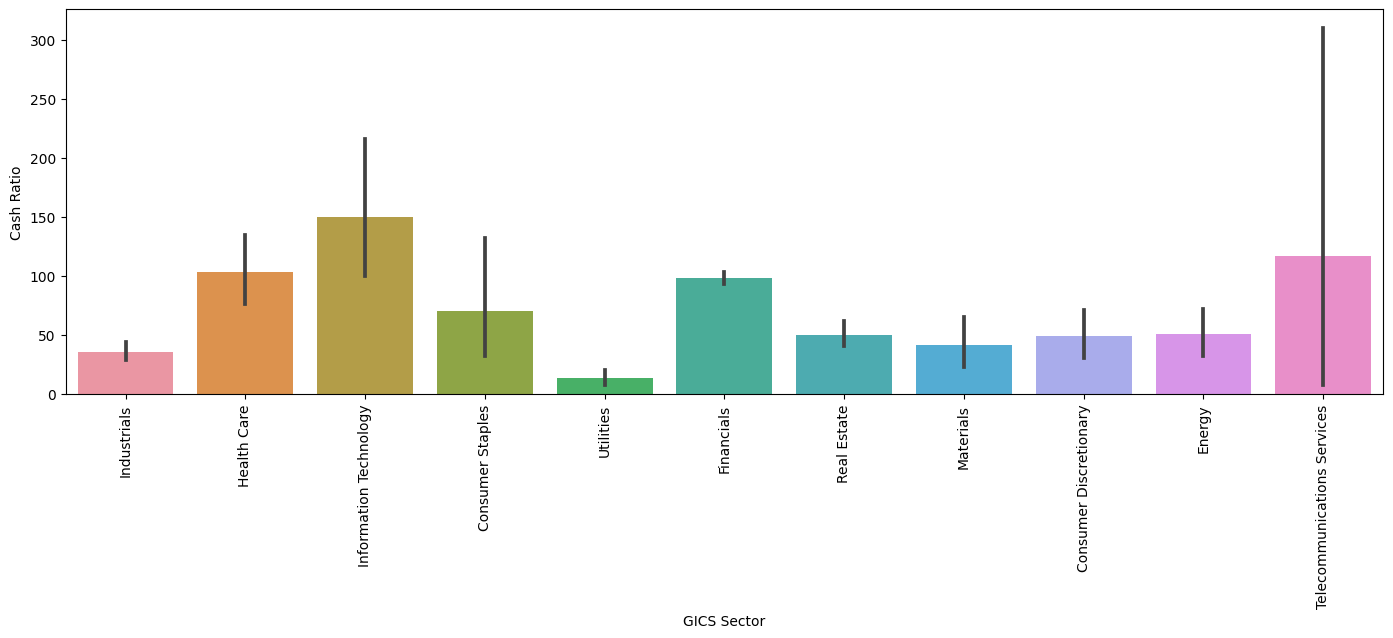

In [ ]:
plt.figure(figsize=(17, 5))
sns.barplot(data=df, x="GICS Sector", y="Cash Ratio")
plt.xticks(rotation=90)
plt.show()

- By average, Information Technology sector has the highest cash ratio(150). Followed by Telecommunications Services(~125), and then Health(100) Care and Financials(100). Though there seems to be an extensive gap between outliers from Telecommunications Services, ranging from close to 0 all the way up to over 300.
- Utilities has the lowest average cash ratio(~20).
- Stocks from Industrials seem to have very low cash ratios (less than 50), even though they make up 15.6% of all stocks.


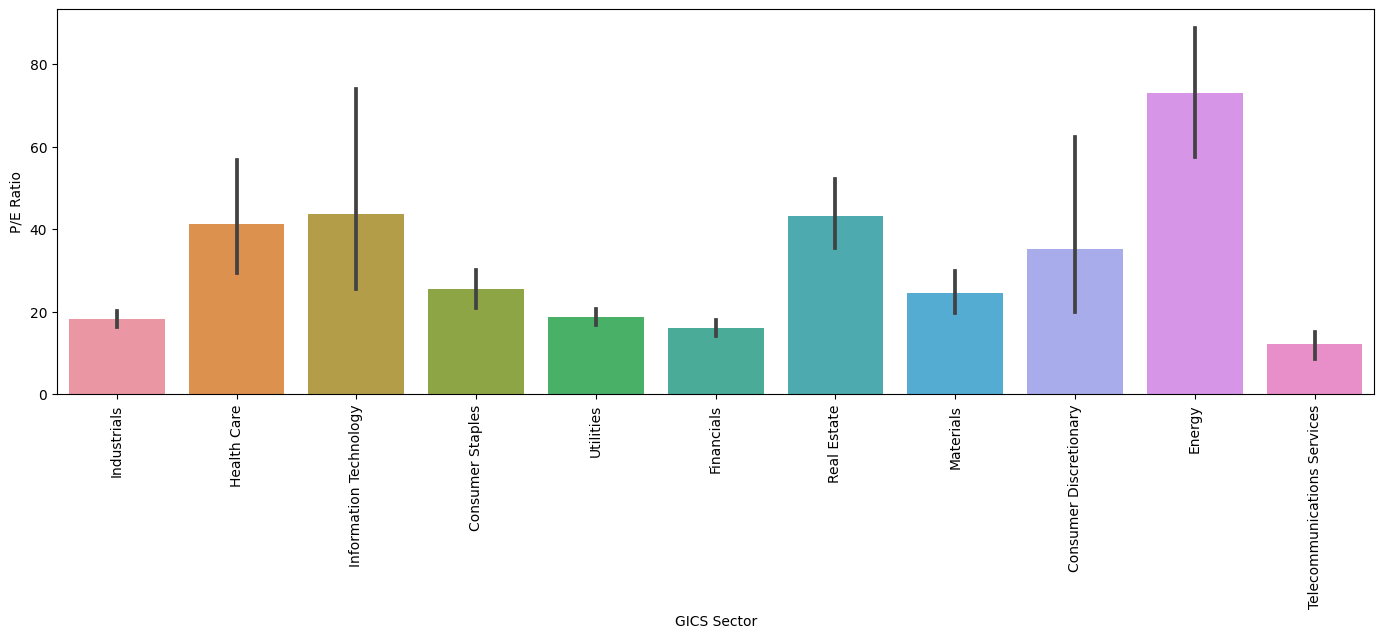

In [ ]:
plt.figure(figsize=(17, 5))
sns.barplot(data=df, x="GICS Sector", y="P/E Ratio")
plt.xticks(rotation=90)
plt.show()

- Energy stocks are by far the most expensive to invest in (~70 dollars per dollar of earning). Information Technology, Real State, and Health Care follow with all three averaging around 40 per dollar of earning.
- The cheapest stocks are from Telecommunication Services with around 10 per dollar of earning, and Financials with around 15 per dollar of earning.


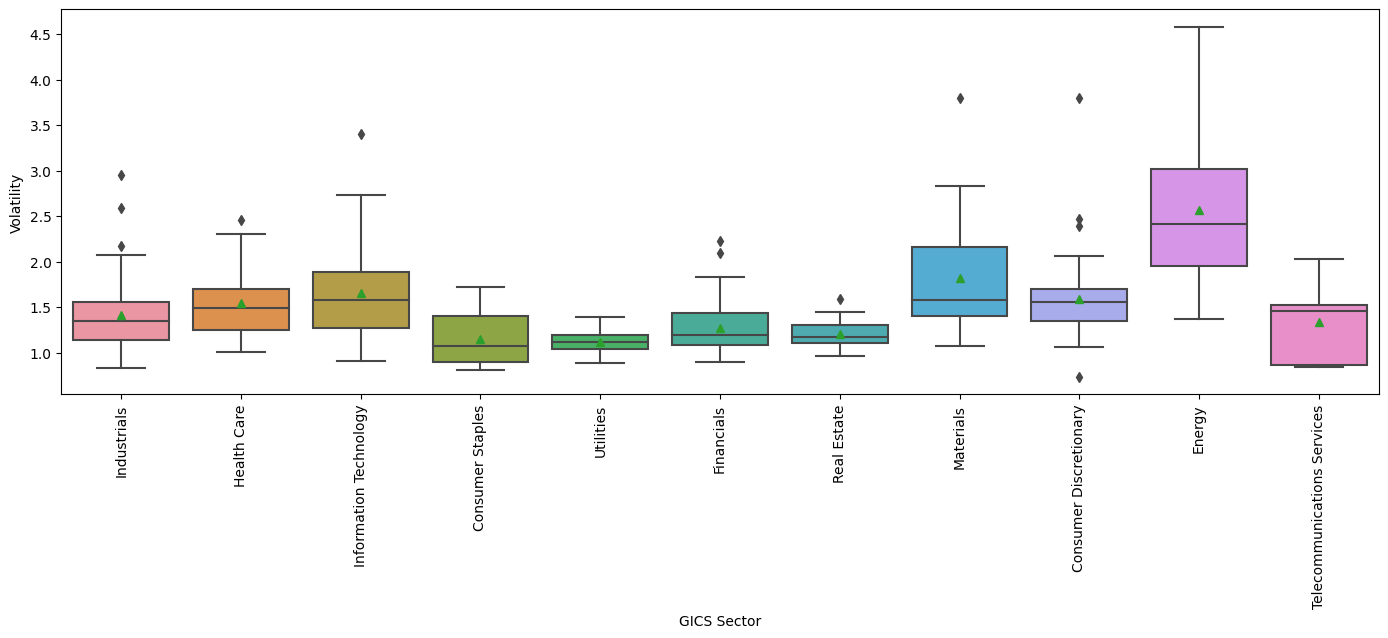

In [ ]:
plt.figure(figsize=(17, 5))
sns.boxplot(data=df, x="GICS Sector", y="Volatility", showmeans=True)
plt.xticks(rotation=90)
plt.show()

- Utilities and Real State stocks tend to be the most stable, while Energy stocks tend to be the most risky and volatile.

## Data Preprocessing

### Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

- There are no duplicated values in the data

### Outlier Detection

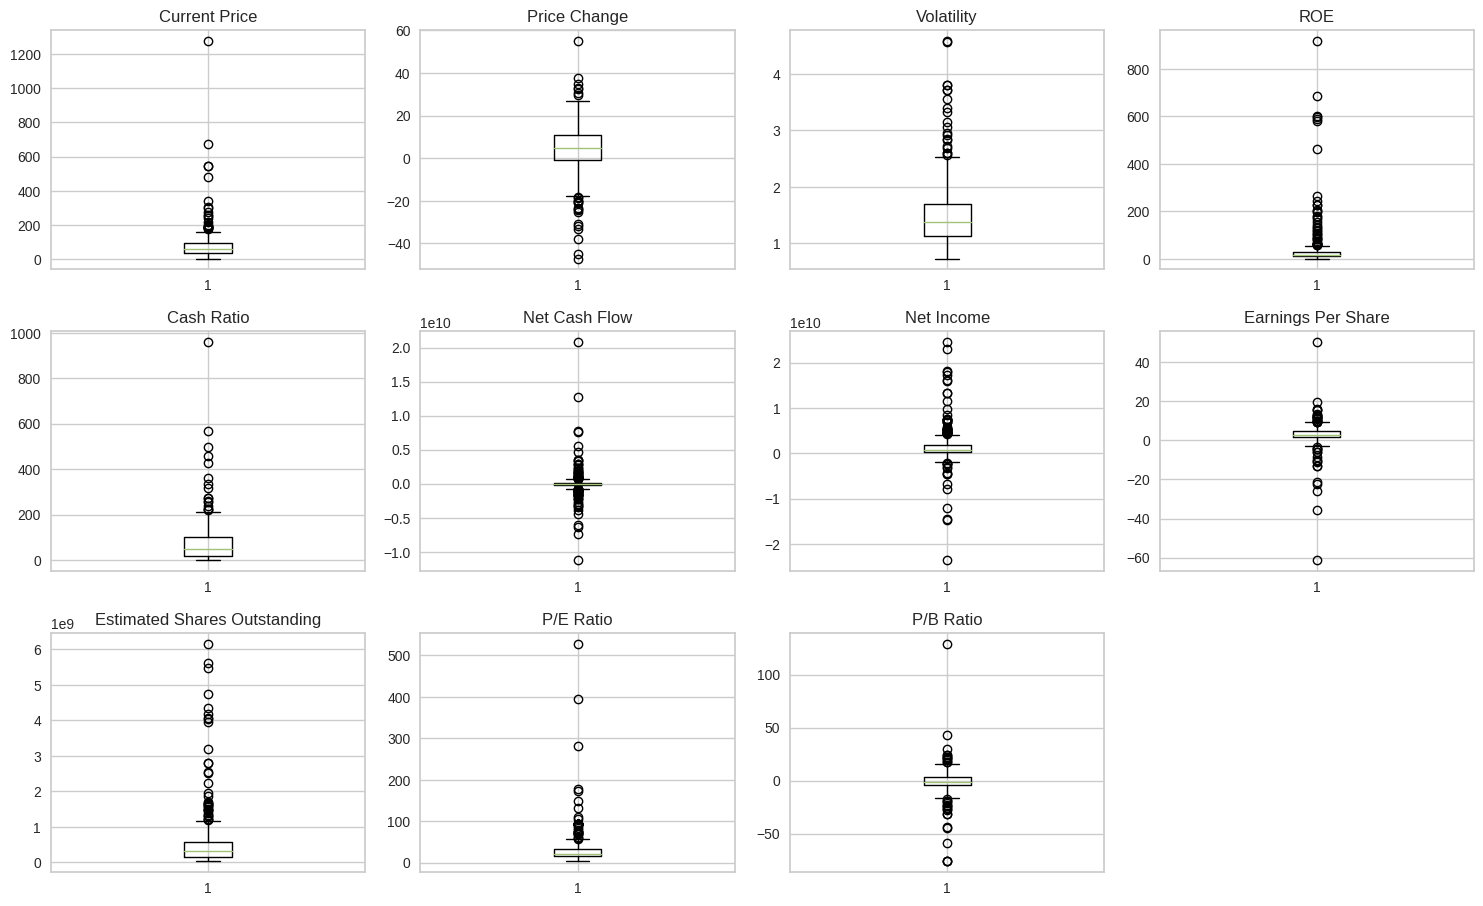

In [ ]:
# outlier detection
plt.figure(figsize=(15, 12))

# Function that looks at all numeric columns and will return boxplots for each variable and its outliers
for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- We won't be treating any of these outliers, as they are correct and real.

### Scaling Data

In [ ]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating df from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

In [ ]:
# Creating df for predicting k means
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.179645269703779
Number of Clusters: 5 	Average Distortion: 2.131715108373145
Number of Clusters: 6 	Average Distortion: 2.0630329460300474
Number of Clusters: 7 	Average Distortion: 2.0095124473733272
Number of Clusters: 8 	Average Distortion: 1.97121645300762
Number of Clusters: 9 	Average Distortion: 1.9368866571678596
Number of Clusters: 10 	Average Distortion: 1.8577691030561478
Number of Clusters: 11 	Average Distortion: 1.8180172295413666
Number of Clusters: 12 	Average Distortion: 1.7667698896770851
Number of Clusters: 13 	Average Distortion: 1.7136256793558315
Number of Clusters: 14 	Average Distortion: 1.7279642702320086


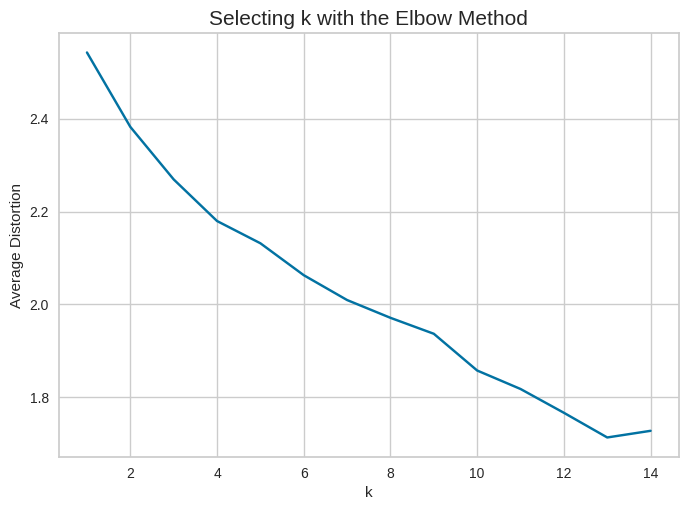

In [ ]:
# Plotting elbow graph
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(
            np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=15)
plt.show()

- We will try 6 and 8 clusters.

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.4495910932182279
For n_clusters = 5, silhouette score is 0.4253135309990827
For n_clusters = 6, silhouette score is 0.3822929667035764
For n_clusters = 7, silhouette score is 0.386652027638425
For n_clusters = 8, silhouette score is 0.34634733412106833
For n_clusters = 9, silhouette score is 0.41586987432475536
For n_clusters = 10, silhouette score is 0.1812678287666088
For n_clusters = 11, silhouette score is 0.15550619803809387
For n_clusters = 12, silhouette score is 0.1540950397269767
For n_clusters = 13, silhouette score is 0.174341578255535
For n_clusters = 14, silhouette score is 0.1462581620316193


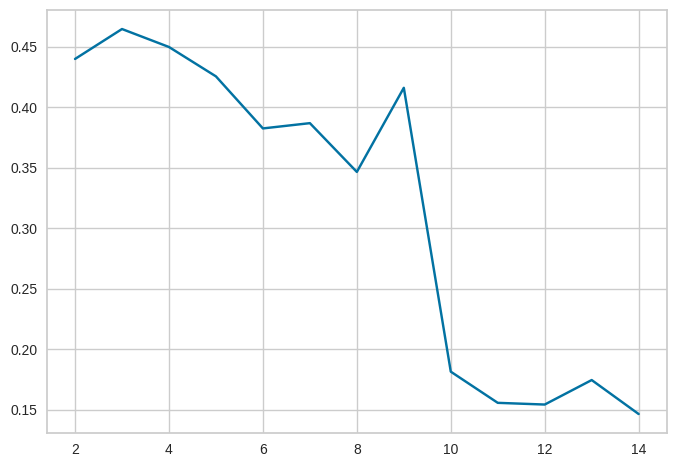

In [ ]:
# Plotting silhouette scores
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
plt.plot(cluster_list, sil_score)

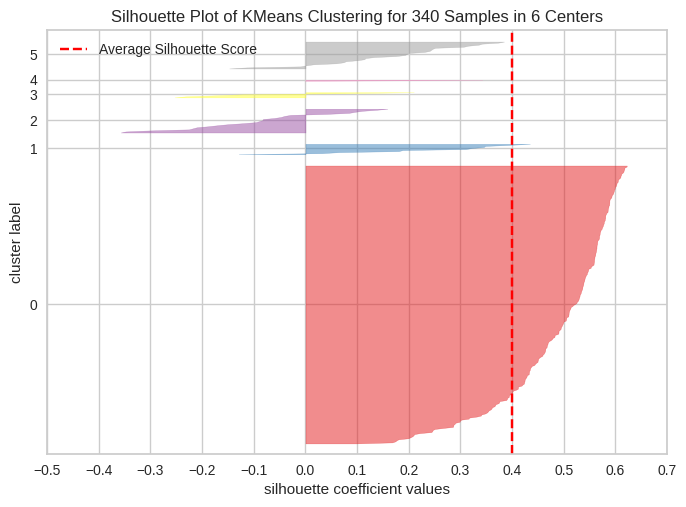

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with 6 silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

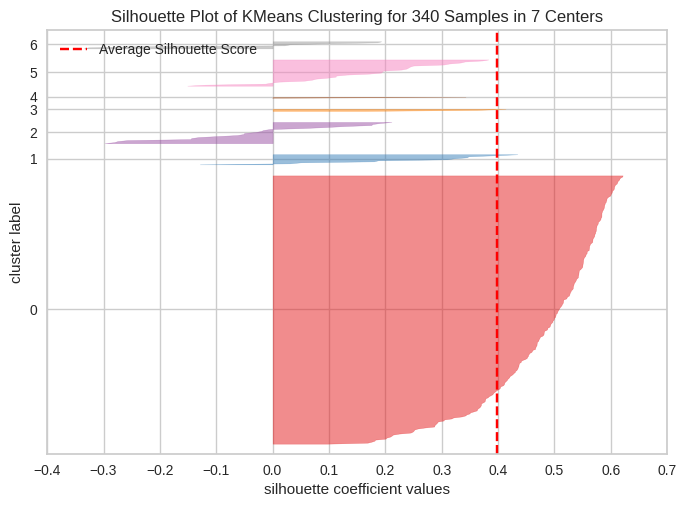

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with 7 silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

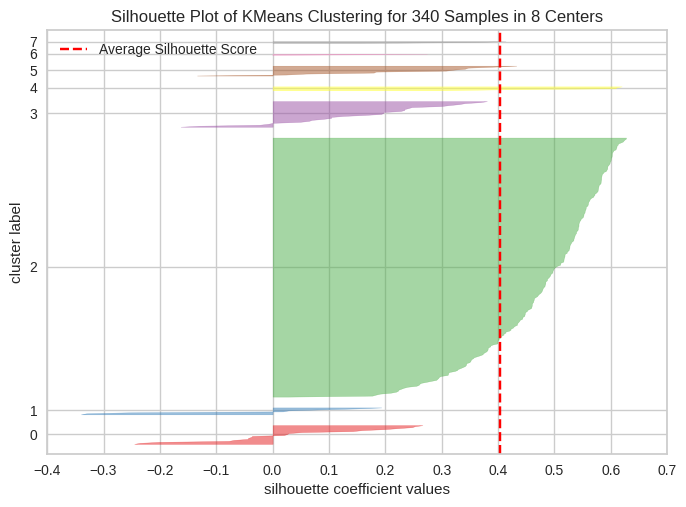

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with 8 silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

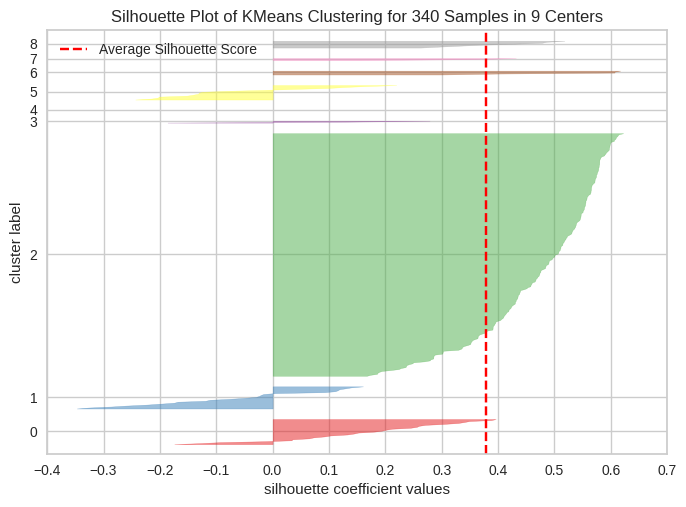

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with 9 silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

- After comparing different no. of clusters, we'll go with 6, as this number of clusters provides the highest average silhouette score with all clusters reaching above 0.2, scoring higher than the rest, and negative scores are considerably better as well.

In [ ]:
# Creating final k-means model
kmeans = KMeans(n_clusters=8, random_state=1)
kmeans.fit(k_means_df)

KMeans(random_state=1)

In [ ]:
df1_kmeans = df.copy()

In [ ]:
# Adding kmeans cluster labels to the dfs
k_means_df["K_means_segments"] = kmeans.labels_
df1_kmeans["K_means_segments"] = kmeans.labels_

###Cluster Profiling

In [ ]:
k_means_cluster_profile = df1_kmeans.groupby("K_means_segments").mean()

In [100]:
k_means_cluster_profile["count_in_each_segment"] = (
    df1_kmeans.groupby("K_means_segments")["Security"].count().values
)

In [101]:
# Display cluster profiles
k_means_cluster_profile.T.style.highlight_max(color="lightgreen", axis=1)

K_means_segments,0,1,2,3,4,5,6,7
Current Price,94.694921,93.732001,632.714991,55.660465,33.169958,50.517273,44.470001,108.304002
Price Change,15.502080,2.459763,7.374164,7.225685,-16.322215,5.747586,11.397804,10.737770
Volatility,1.841236,1.254320,1.541343,1.483947,2.893774,1.130399,2.405408,1.165694
ROE,24.904762,25.540323,19.333333,24.881944,70.857143,31.090909,917.000000,566.200000
Cash Ratio,308.238095,39.685484,158.333333,63.229167,46.821429,75.909091,80.000000,26.600000
Net Cash Flow,687734476.190476,355187258.064516,-24046333.333333,-140355444.444444,-241306821.428571,-1072272727.272727,698000000.000000,-278760000.000000
Net Income,815863095.238095,2081785209.677419,907393166.666667,1145705659.722222,-2881485714.285714,14833090909.090910,-23528000000.000000,687180000.000000
Earnings Per Share,1.779048,4.873427,16.270000,2.810069,-6.861071,4.154545,-61.200000,1.548000
Estimated Shares Outstanding,727042482.384762,391077569.925645,125797901.323333,472341728.485625,508448395.594286,4298826628.727273,384444444.400000,349607057.720000
P/E Ratio,77.753570,23.555495,123.049240,22.885434,73.940860,14.803577,93.089287,34.898915


In [102]:
for cl in df1_kmeans["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1_kmeans[df1_kmeans["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'American Electric Power' 'AFLAC Inc'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Bank of America Corp' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'Boston Properties' 'Chubb Limited'
 'Crown Castle International Corp.' 'Carnival Corp.' 'Church & Dwight'
 'C. H. Robinson Worldwide' 'CIGNA Corp.' 'CME Group Inc.'
 'Capital One Financial' 'The Cooper Companies' 'CenturyLink Inc'
 'CVS Health' 'Dominion Resources' 'Delta Air Lines'
 'Discover Financial Services' 'Danaher Corp.' 'The Walt Disney Company'
 'Discovery Communications-A' 'Discovery Communications-C'
 'Dun & Bradstreet' 'Dr Pepper Snapple Group' 'Duke Energy' 'Ecolab Inc.'
 'Consolidated Edison' 'Equifax Inc.' "Edison I

In [103]:
df1_kmeans.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary          3
                  Consumer Staples                1
                  Energy                          1
                  Health Care                     6
                  Information Technology          7
                  Materials                       1
                  Real Estate                     1
                  Telecommunications Services     1
1                 Consumer Discretionary         15
                  Consumer Staples               10
                  Financials                     23
                  Health Care                    11
                  Industrials                    24
                  Information Technology          4
                  Materials                       4
                  Real Estate                    13
                  Telecommunications Services     1
                  Utilities                      19
2                 

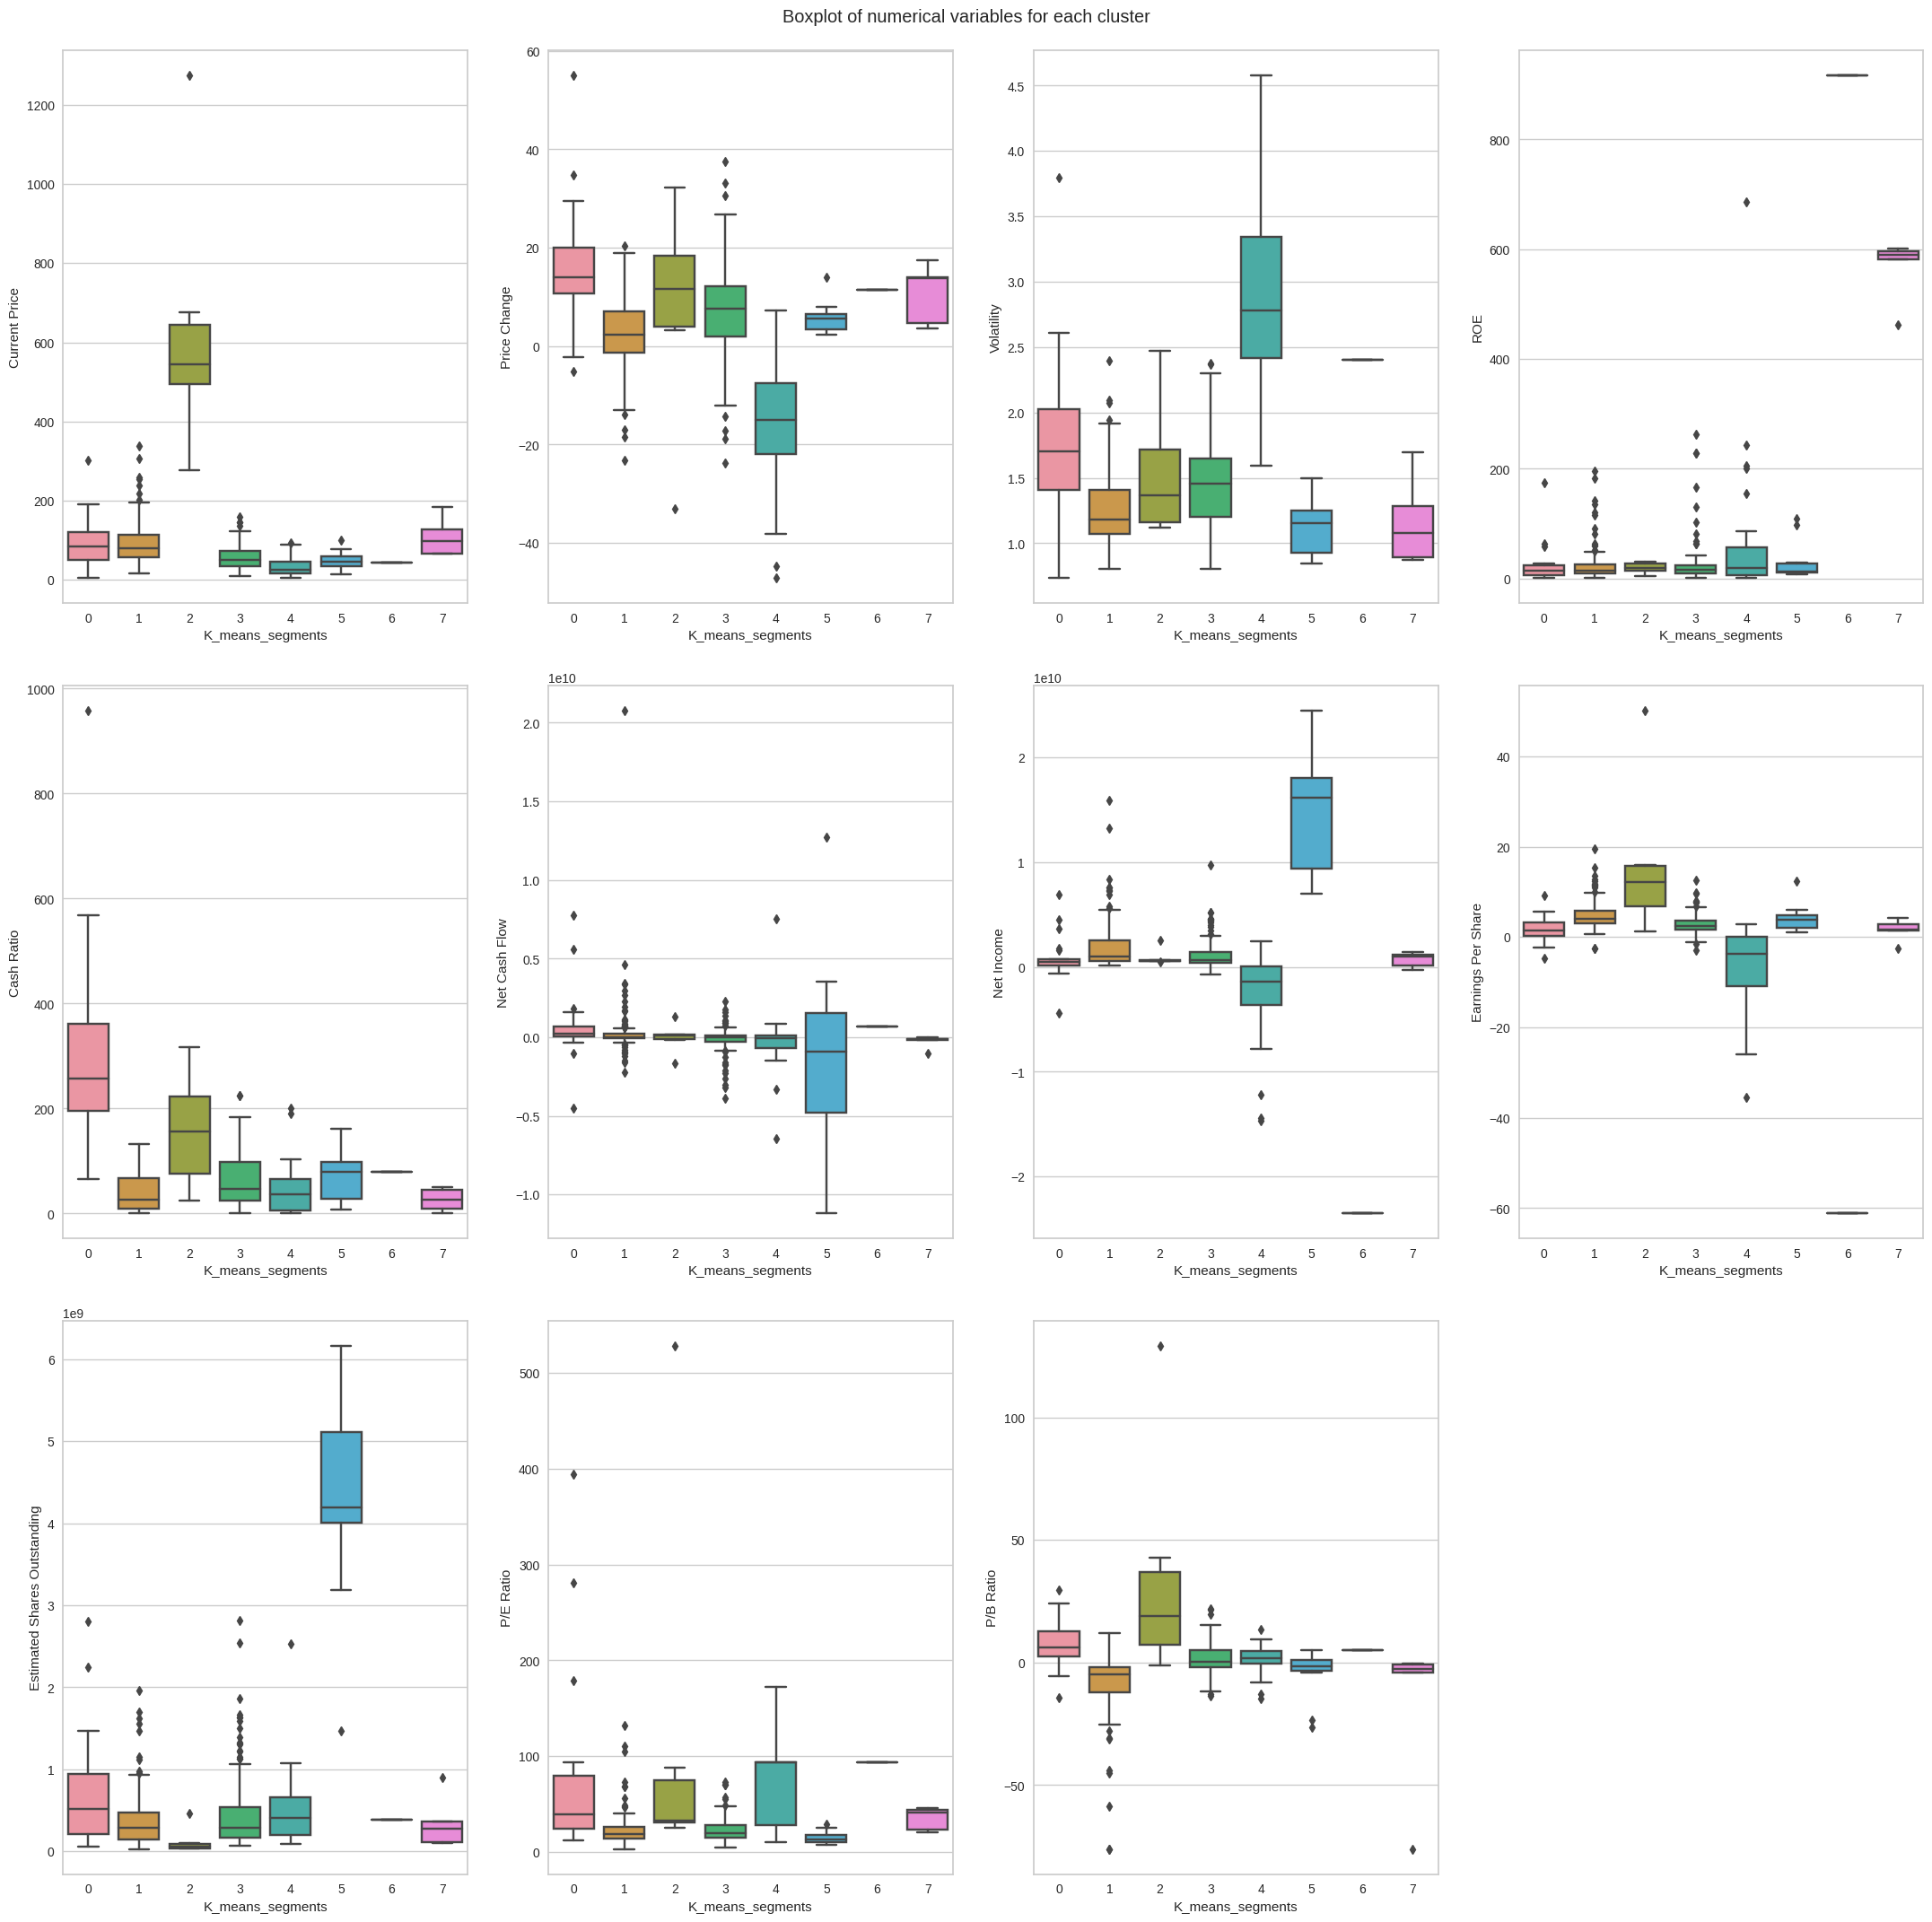

In [104]:
plt.figure(figsize=(22, 22))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1_kmeans, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='x', ylabel='y'>

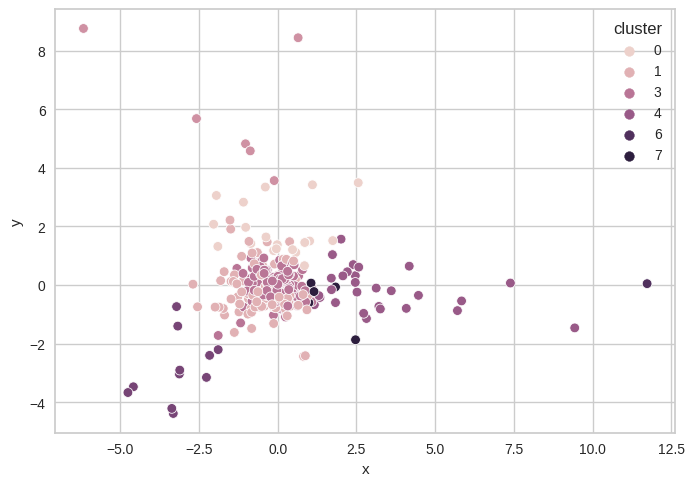

In [105]:
dim_reduction = PCA(n_components=2)
viz_df = pd.DataFrame(
    dim_reduction.fit_transform(subset_scaled_df),
    columns=['x', 'y']
)

viz_df['cluster'] = kmeans.labels_
viz_df

sns.scatterplot(
    data=viz_df,
    x='x',
    y='y',
    hue='cluster'
)

- Companies from cluster 0 are mainly from information technology and health care. They rank the highest in Cash Ratio and also had the highest positive price change in the past 13 weeks.
- Companies from cluster 2 have the most expensive stock prices but also provide the highest earnings per share. They can be considered premium stocks.
- Companies from cluster 4 are mainly from the Energy sector. They have high volatility and suffered negative price changes. These companies are facing financial challenges.
- Companies from cluster 5 have the highest net incomes and provide the most shares in the market. Their P/B ratios are low, meaning they're undervalued. They seem like stable companies for long term investment.
- Companies from cluster 6 have the highest Return of Investment and net cash flow, but don't seem to be providing stable earnings per share.

## Hierarchical Clustering

In [ ]:
# Copy for hierarchical clustering df
df_hc = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_hc, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_hc))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
) )

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


In [91]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_hc, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_hc))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [92]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
) )

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


### Checking Dendrograms

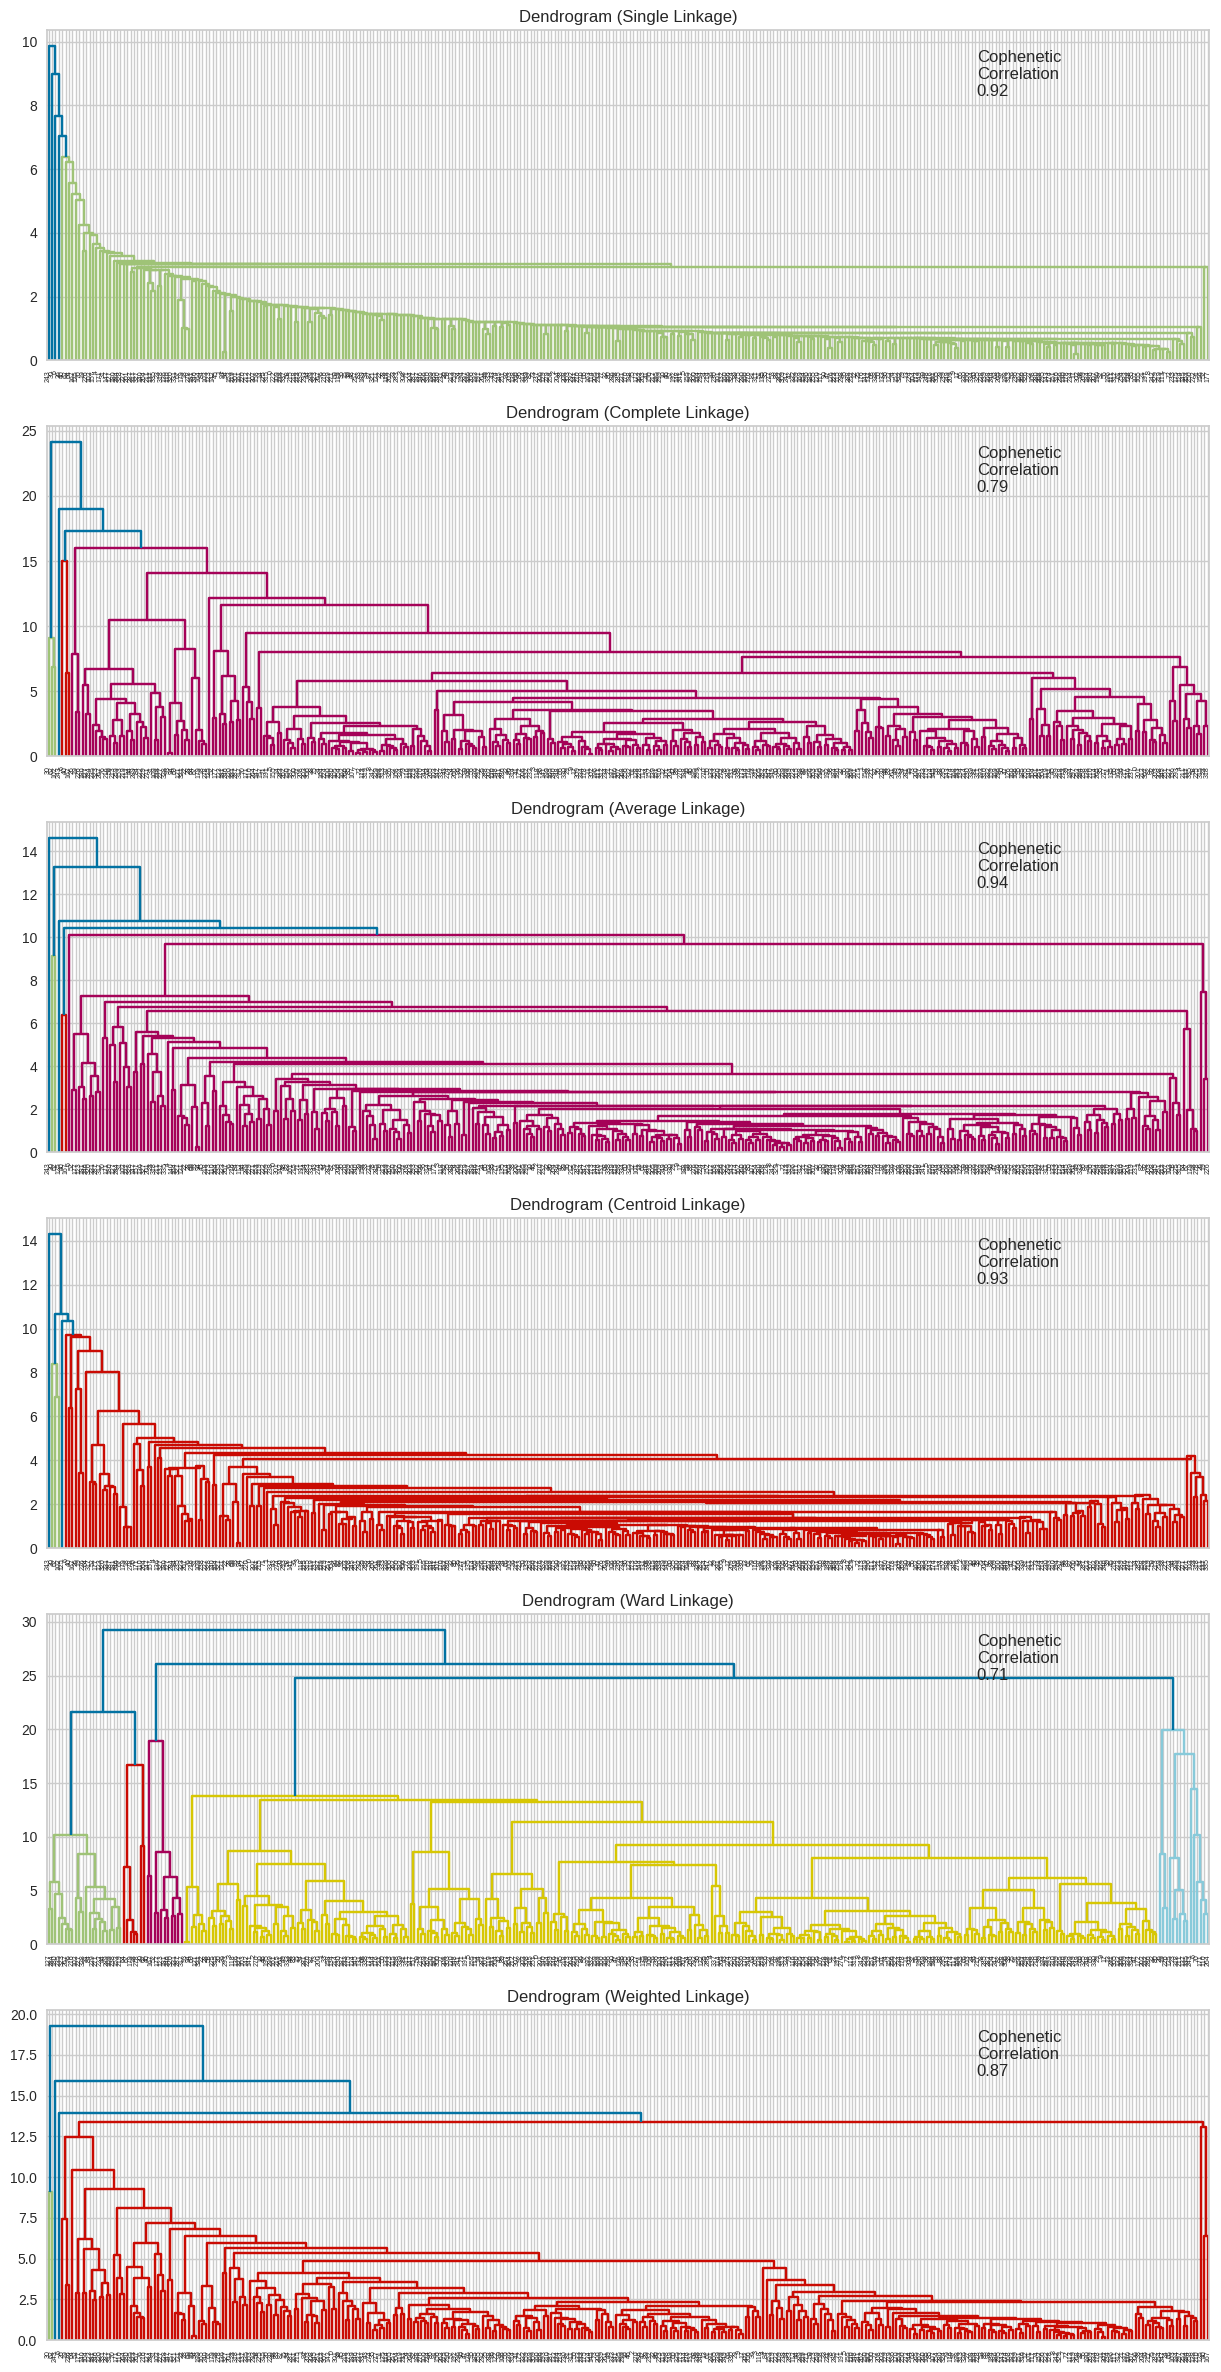

In [93]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_hc, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_hc))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
)

- The average and centroid linkage methods ranked the highest, with cophenetic correlation values of 0.94 and 0.93. We'll choose to go with average linkage and use 8 clusters.

In [148]:
# Creating Model with sklearn
HCmodel = AgglomerativeClustering(n_clusters=8, affinity="euclidean", linkage="average")
HCmodel.fit(df_hc)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=8)

In [149]:
df1_hc = df.copy()

In [150]:
df_hc["HC_Clusters"] = HCmodel.labels_
df1_hc["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [151]:
hc_cluster_profile = df1_hc.groupby("HC_Clusters").mean()

In [152]:
hc_cluster_profile["count_in_each_segments"] = (
    df1_hc.groupby("HC_Clusters")["Security"].count().values
)

In [153]:
hc_cluster_profile.T.style.highlight_max(color="lightgreen", axis=0)

HC_Clusters,0,1,2,3,4,5,6,7
Current Price,75.017416,327.006671,4.500000,1274.949951,25.640000,276.570007,44.470001,104.660004
Price Change,3.937751,21.917380,-38.101788,3.190527,11.237908,6.189286,11.397804,16.224320
Volatility,1.513415,2.029752,4.559815,1.268340,1.322355,1.116976,2.405408,1.320606
ROE,35.621212,4.000000,687.000000,29.000000,12.500000,30.000000,917.000000,8.000000
Cash Ratio,66.545455,106.000000,22.000000,184.000000,130.500000,25.000000,80.000000,958.000000
Net Cash Flow,-39846757.575758,698240666.666667,-3283000000.000000,-1671386000.000000,16755500000.000000,90885000.000000,698000000.000000,592000000.000000
Net Income,1549443100.000000,287547000.000000,-14685000000.000000,2551360000.000000,13654000000.000000,596541000.000000,-23528000000.000000,3669000000.000000
Earnings Per Share,2.904682,0.750000,-22.430000,50.090000,3.295000,8.910000,-61.200000,1.310000
Estimated Shares Outstanding,562266326.402576,366763235.300000,654703522.100000,50935516.070000,2791829362.100000,66951851.850000,384444444.400000,2800763359.000000
P/E Ratio,29.091275,400.989188,28.407929,25.453183,13.649696,31.040405,93.089287,79.893133


- Most companies are from cluster 0. They rank the highest in Cash Ratio and also had the highest in net income even though their cash flow is negative. Their stock prices are undervalued.
- There's only 3 companies from cluster 1. They have the most net cash flow and have the highest positive price change.
- The rest of th clusters are composed of only one or two companies.

In [154]:
df1_hc.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary         38
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    39
             Industrials                    53
             Information Technology         29
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
2            Energy                          1
3            Consumer Discretionary          1
4            Financials                      1
             Information Technology          1
5            Information Technology          1
6            Energy                          1
7            Inform

## K-means vs Hierarchical Clustering

- The k-means technique took the less time to execute due to it's simplicity compared to hierarchical clustering.
- K-means clustering was also able to provide better and more defines clusters.
- No strong correlations can be made from comparing clusters from both techniques.
- We noticed that the appropriate number of clusters needed is 6.

## Actionable Insights & Recommendations

- Cluster 0:
  - There are 21 companies in this cluster.
  - They mainly come from information technology and health care.
  - They have the highest positive price change.
  - They rank the highest in Cash Ratio
- Cluster 1:
  - There are 124 companies in this cluster.
  - They mainly come from consumer discretionary, real state, industrials, and financial sectors.
  - They're stable and don't seem to face much financial challenges.
  - They don't have high validity and their shares are undervalued.
- Cluster 2:
  - There are 6 companies in this cluster.
  - Have the most expensive stock prices but also provide the highest earnings per share.
  - They can be considered premium stocks.
- Cluster 3:
  - There are 144 companies in this cluster.
  - They mainly come from the industrials, health care, financial, and information technology sectors.
  - They are somewhat alike to cluster 1 but suffer from negative cash flows.
  - They tend to be cheaper but give less return.
- Cluster 4:
  - There are 28 companies in this cluster.
  - They mainly come from the Energy sector.
  - They have high volatility and suffered negative price changes.
  - These companies are facing financial challenges.
- Cluster 5:
  - There are 11 companies in this cluster.
  - have the highest net incomes and provide the most shares in the market.
  - Their P/B ratios are low, meaning they're undervalued.
  - They seem like stable companies for long term investment.





- Cluster 5 companies are the most estable and reliable for long-term investment.
- Cluster 4 companies are high risk investments.
- Cluster 2 companies provide the highest returns but are also the most expensive.
- Cluster 0 and 1 are also good investment options with lower costs and less risks involved.